In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=802397fdb1a6caafd5977aa8e75b0bae991b895d49f3a10c6393fc49a8bff063
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


#Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyswarm import pso
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy import stats

#Read Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/TA/Multiclass Diabetes Dataset.csv'

data = pd.read_csv(file_path)
data.info()
# Display the first few rows of the dataset to understand its structure
display(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,30.0,2
260,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,36.6,2
261,1,60,20.8,800,9.0,2.3,1.1,0.9,0.9,0.5,33.0,2
262,1,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,2


#EDA

## Pengecekan nilai null di dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [6]:

# Rename columns
data = data.rename(columns={'AGE': 'Age', 'Cr': 'Creatine', 'Chol': 'Cholesterol', 'TG': 'Trigliserida'})

# Display the updated DataFrame to verify the changes
display(data)

,Gender,Age,Urea,Creatine,HbA1c,Cholesterol,Trigliserida,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,30.0,2
260,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,36.6,2
261,1,60,20.8,800,9.0,2.3,1.1,0.9,0.9,0.5,33.0,2
262,1,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,2


## Pengecekan entry duplikat pada dataset

In [7]:
# Cek duplikat
duplicates = data[data.duplicated()]

if not duplicates.empty:
    print("Duplicate Rows:")
    display(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [8]:
data1 = data.copy()

In [9]:

# Replace gender values
data1['Gender'] = data1['Gender'].replace({0: 'Female', 1: 'Male'})

# Replace class values
data1['Class'] = data1['Class'].replace({0: 'Nondiabetes', 1: 'Pradiabetes', 2: 'Diabetes'})

# Display the updated DataFrame
display(data1)

,Gender,Age,Urea,Creatine,HbA1c,Cholesterol,Trigliserida,HDL,LDL,VLDL,BMI,Class
0,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Nondiabetes
1,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,Nondiabetes
2,Male,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,Nondiabetes
3,Female,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,Nondiabetes
4,Female,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,Nondiabetes
...,...,...,...,...,...,...,...,...,...,...,...,...
259,Female,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,30.0,Diabetes
260,Female,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,36.6,Diabetes
261,Male,60,20.8,800,9.0,2.3,1.1,0.9,0.9,0.5,33.0,Diabetes
262,Male,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Diabetes


## Statistika deskriptif kolom numerik

In [10]:
data1.describe()

,Age,Urea,Creatine,HbA1c,Cholesterol,Trigliserida,HDL,LDL,VLDL,BMI
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856
std,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652
min,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000
25%,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000
50%,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000
75%,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000
max,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000


## statistika deskriptif kolom kategorikal

In [11]:
data1.describe(include='object')

,Gender,Class
count,264,264
unique,2,3
top,Male,Diabetes
freq,144,128


## Pengecekan nilai entry yang value 0

In [12]:
rows_with_zeros = data1[(data1 == 0).any(axis=1)]

print(rows_with_zeros)

   Gender  Age  Urea  Creatine  HbA1c  Cholesterol  Trigliserida  HDL  LDL  \
93   Male   77   5.0       106    5.4          0.0           2.8  0.8  1.8   

    VLDL   BMI        Class  
93   0.7  19.0  Nondiabetes  


In [13]:
categorical_value = data1[["Gender","Class"]]
numerical_value = data1[['Age','Cholesterol','Creatine', 'HDL', 'LDL', 'VLDL', 'Urea', 'HbA1c','Trigliserida','BMI']]

## Distribusi class menggunakan Pie Chart

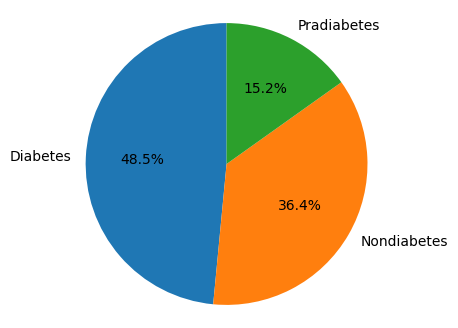

In [14]:
# prompt: make a pie chart for Class column

# Assuming data1 DataFrame is already created as shown in the previous code.

import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = data1['Class'].value_counts()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Pengecekan nilai outlier dalam dataset

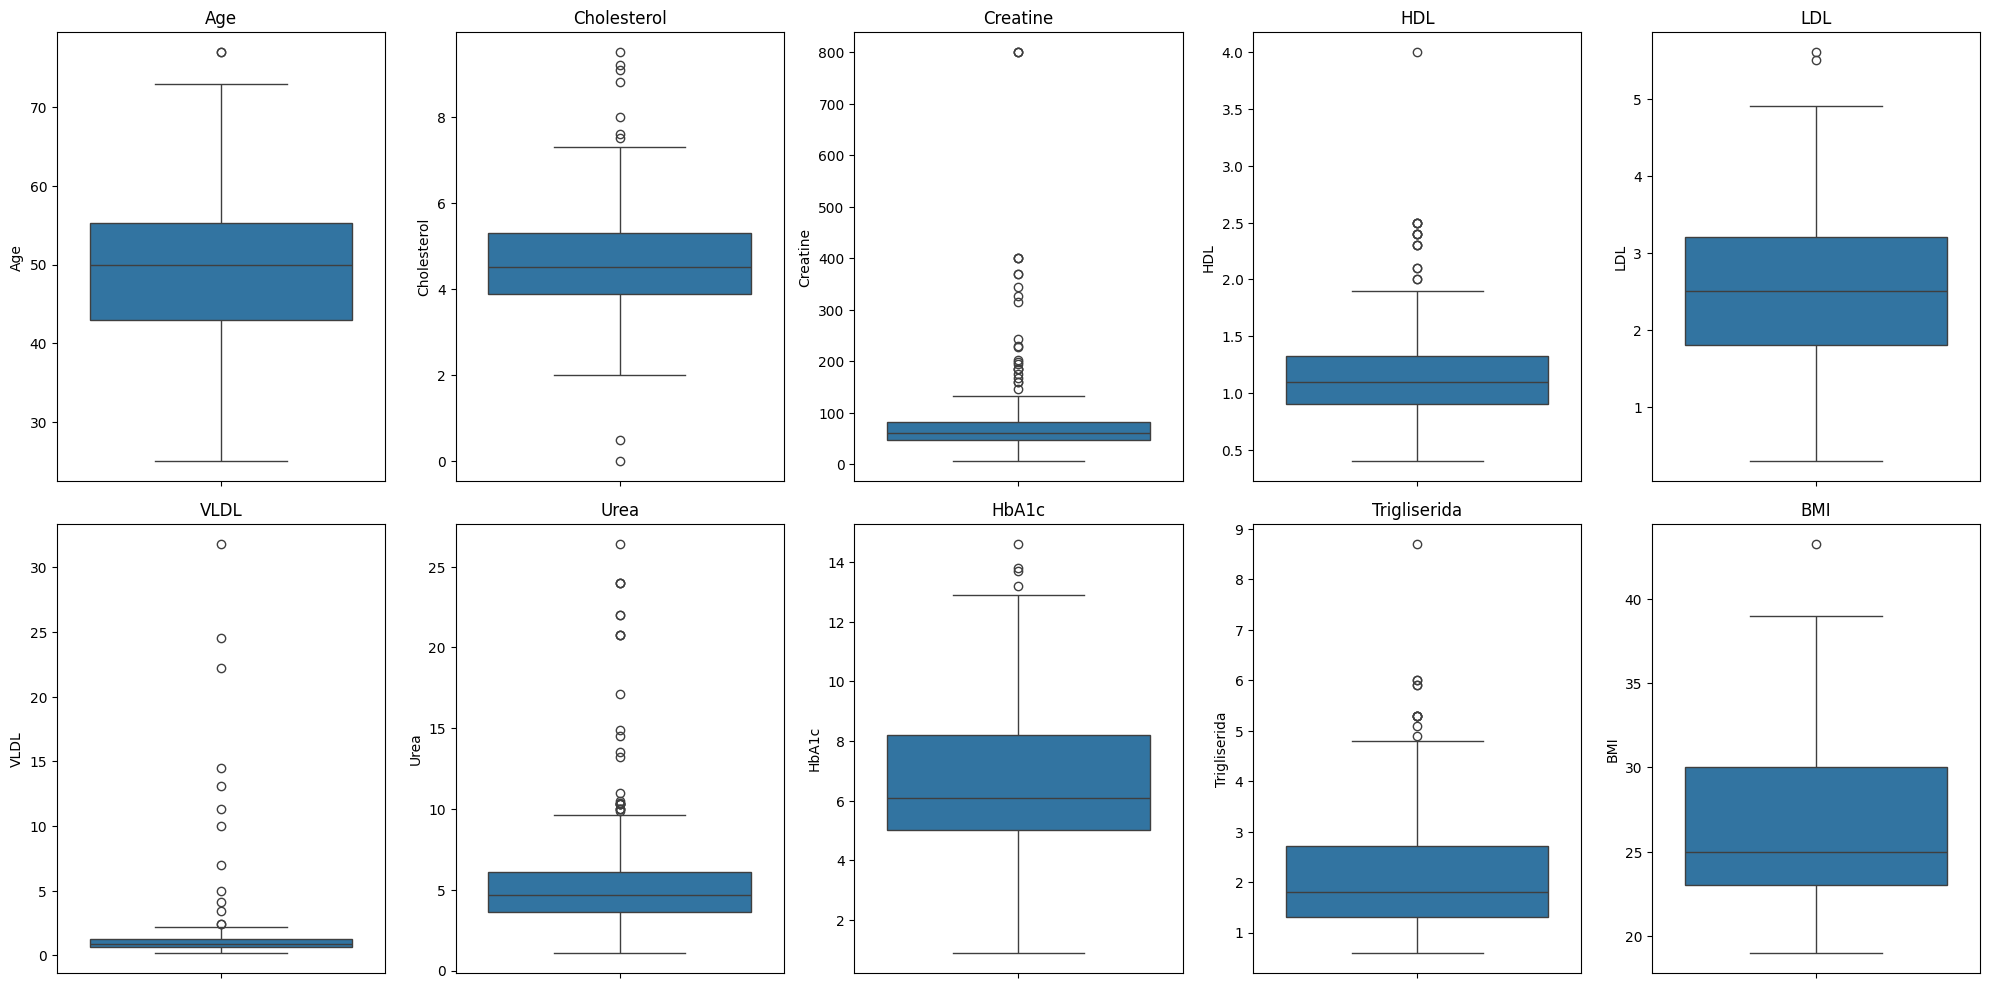

In [15]:
# prompt: make boxplot for numerical value in 3 column and 3 row

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_value' DataFrame is already defined

# Reshape the data for the subplots
num_cols = 5  # Changed to 3 columns
num_rows = 2  # Changed to 3 rows
num_cols_per_row = num_cols

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 10))  # Adjust figsize as needed

for i, col in enumerate(numerical_value.columns):
    row = i // num_cols_per_row
    col_idx = i % num_cols_per_row
    sns.boxplot(y=numerical_value[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

plt.tight_layout()  # Adjust layout to prevent overlapping titles
plt.show()

In [16]:
min_max_table = pd.DataFrame({
    'Minimum': data1.min(),
    'Maximum': data1.max()
})

# Menampilkan tabel
print(min_max_table)

               Minimum      Maximum
Gender          Female         Male
Age                 25           77
Urea               1.1         26.4
Creatine             6          800
HbA1c              0.9         14.6
Cholesterol        0.0          9.5
Trigliserida       0.6          8.7
HDL                0.4          4.0
LDL                0.3          5.6
VLDL               0.2         31.8
BMI               19.0        43.25
Class         Diabetes  Pradiabetes


## Univariat Analysis

### Cholesterol

Text(3.675515151515152, 26.880000000000003, 'Mean: 4.59')

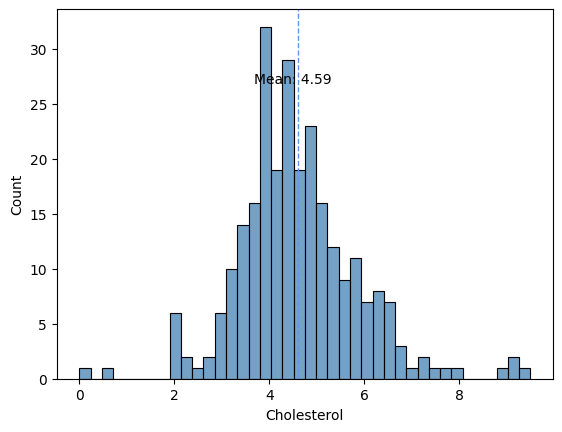

In [17]:
sns.histplot(data1['Cholesterol'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['Cholesterol'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['Cholesterol'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['Cholesterol'].mean()))

### Gender

/tmp/ipython-input-18-1560249144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-18-1560249144.py:4: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


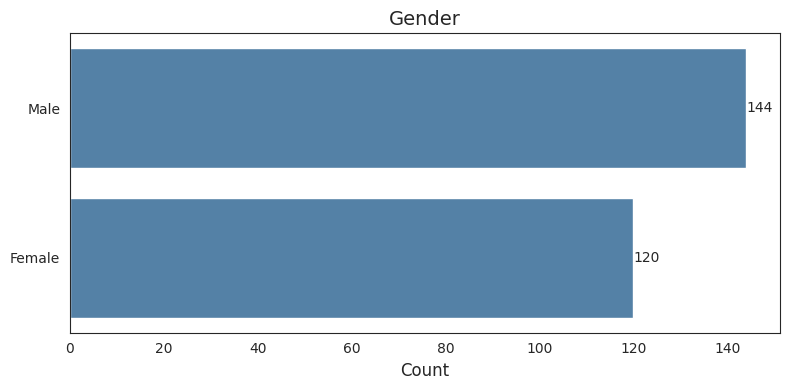

In [18]:
sns.set_style("white")

plt.figure(figsize=(8, 4))
sns.countplot(
    data=data1,
    y='Gender',
    palette=['steelblue'],  # Single color for all bars
    order=data1['Gender'].value_counts().index  # Ensure order based on counts
)

# Add labels for counts on the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')

# Add chart title and axis labels
plt.title('Gender', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('')


# Adjust layout for better appearance
plt.tight_layout()
plt.show()

###Age

Text(39.618181818181824, 30.24, 'Mean: 49.52')

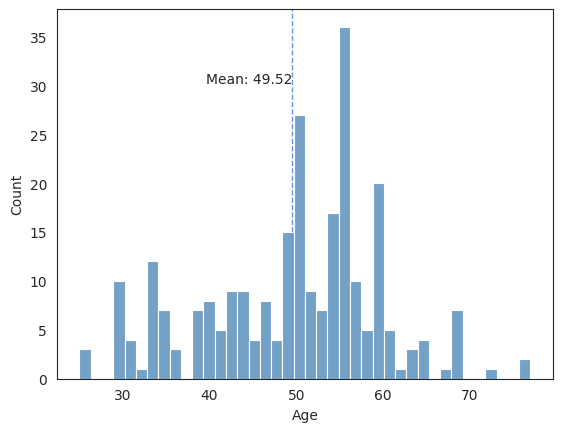

In [19]:
sns.histplot(data1['Age'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['Age'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['Age'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['Age'].mean()))

### Urea

Text(4.5372121212121215, 39.480000000000004, 'Mean: 5.67')

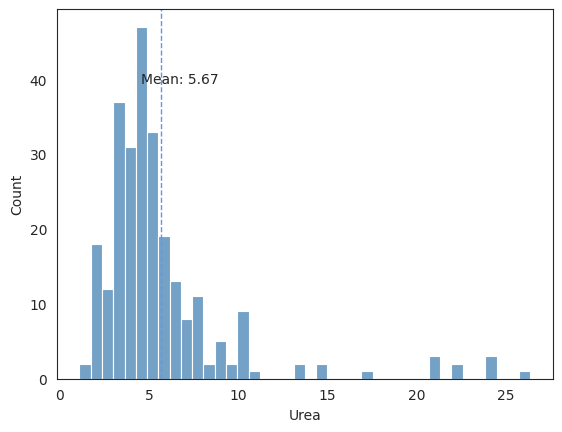

In [20]:
sns.set_style("white")

sns.histplot(data1['Urea'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['Urea'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['Urea'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['Urea'].mean()))


### HDL

Text(0.9463030303030303, 47.88, 'Mean: 1.18')

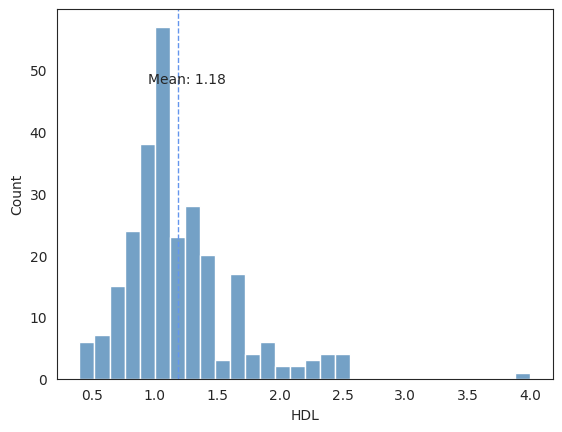

In [21]:
sns.set_style("white")

sns.histplot(data1['HDL'], bins=30, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['HDL'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['HDL'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['HDL'].mean()))

### LDL

Text(2.02469696969697, 18.48, 'Mean: 2.53')

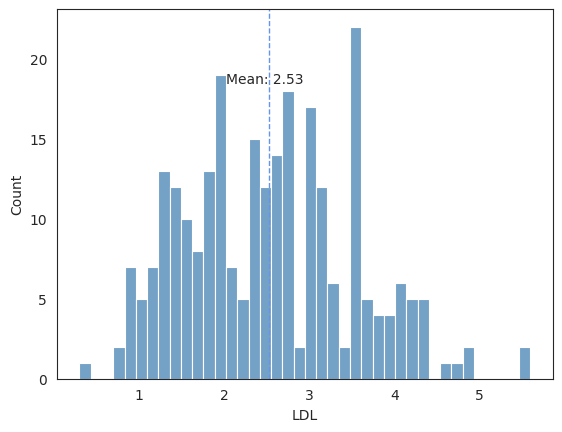

In [22]:
sns.set_style("white")

sns.histplot(data1['LDL'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['LDL'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['LDL'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['LDL'].mean()))


### VLDL

Text(1.1833333333333333, 157.92000000000002, 'Mean: 1.48')

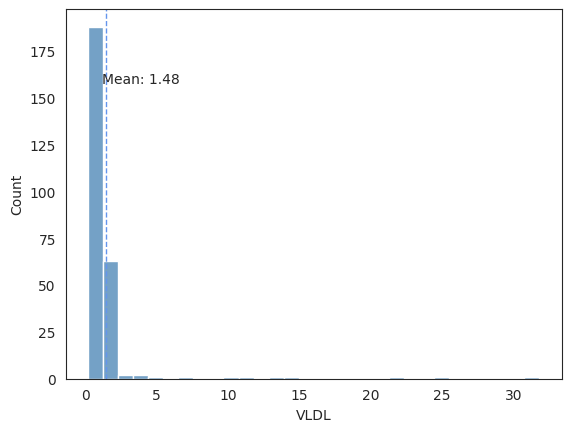

In [23]:
sns.set_style("white")

sns.histplot(data1['VLDL'], bins=30, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['VLDL'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['VLDL'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['VLDL'].mean()))

### HbA1c

Text(5.490181818181819, 33.6, 'Mean: 6.86')

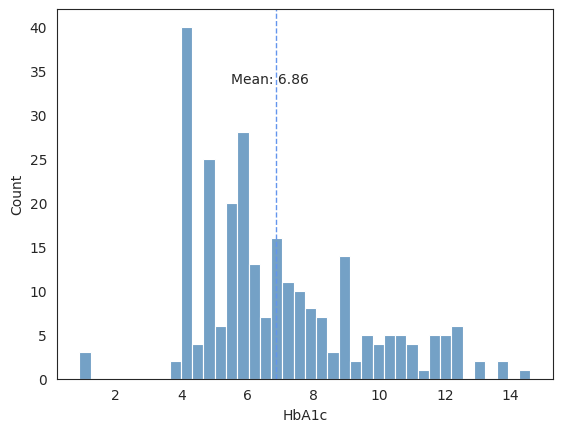

In [24]:
sns.set_style("white")

sns.histplot(data1['HbA1c'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['HbA1c'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['HbA1c'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['HbA1c'].mean()))


In [25]:
data1.columns

Index(['Gender', 'Age', 'Urea', 'Creatine', 'HbA1c', 'Cholesterol',
       'Trigliserida', 'HDL', 'LDL', 'VLDL', 'BMI', 'Class'],
      dtype='object')

###Trigliserida

Text(1.7215151515151517, 25.200000000000003, 'Mean: 2.15')

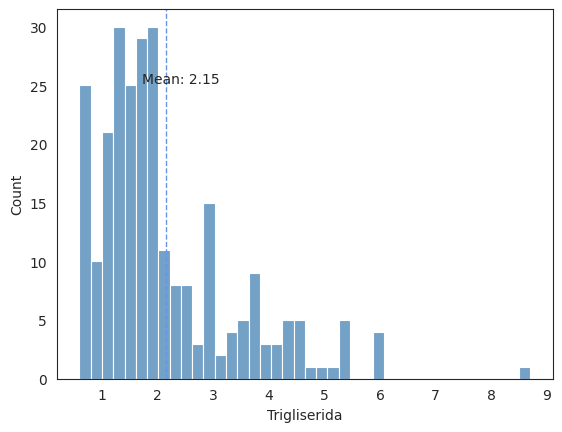

In [26]:
sns.set_style("white")

sns.histplot(data1['Trigliserida'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['Trigliserida'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['Trigliserida'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['Trigliserida'].mean()))

### BMI

Text(21.301484848484847, 32.760000000000005, 'Mean: 26.63')

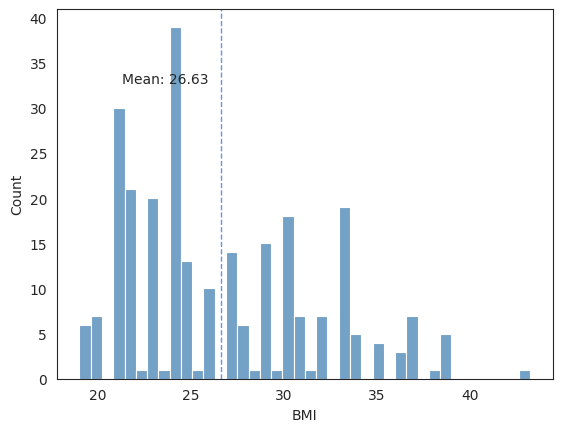

In [27]:
sns.set_style("white")

sns.histplot(data1['BMI'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['BMI'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['BMI'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['BMI'].mean()))

### Creatine

Text(68.64545454545456, 69.72000000000001, 'Mean: 85.81')

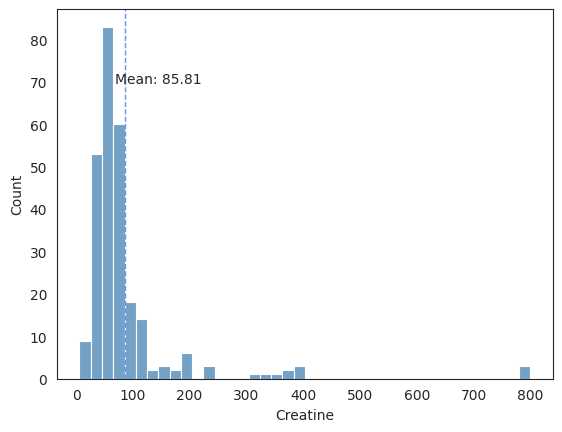

In [28]:
sns.set_style("white")

sns.histplot(data1['Creatine'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['Creatine'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['Creatine'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['Creatine'].mean()))

## Bivariat Analysis

### Cholesterol

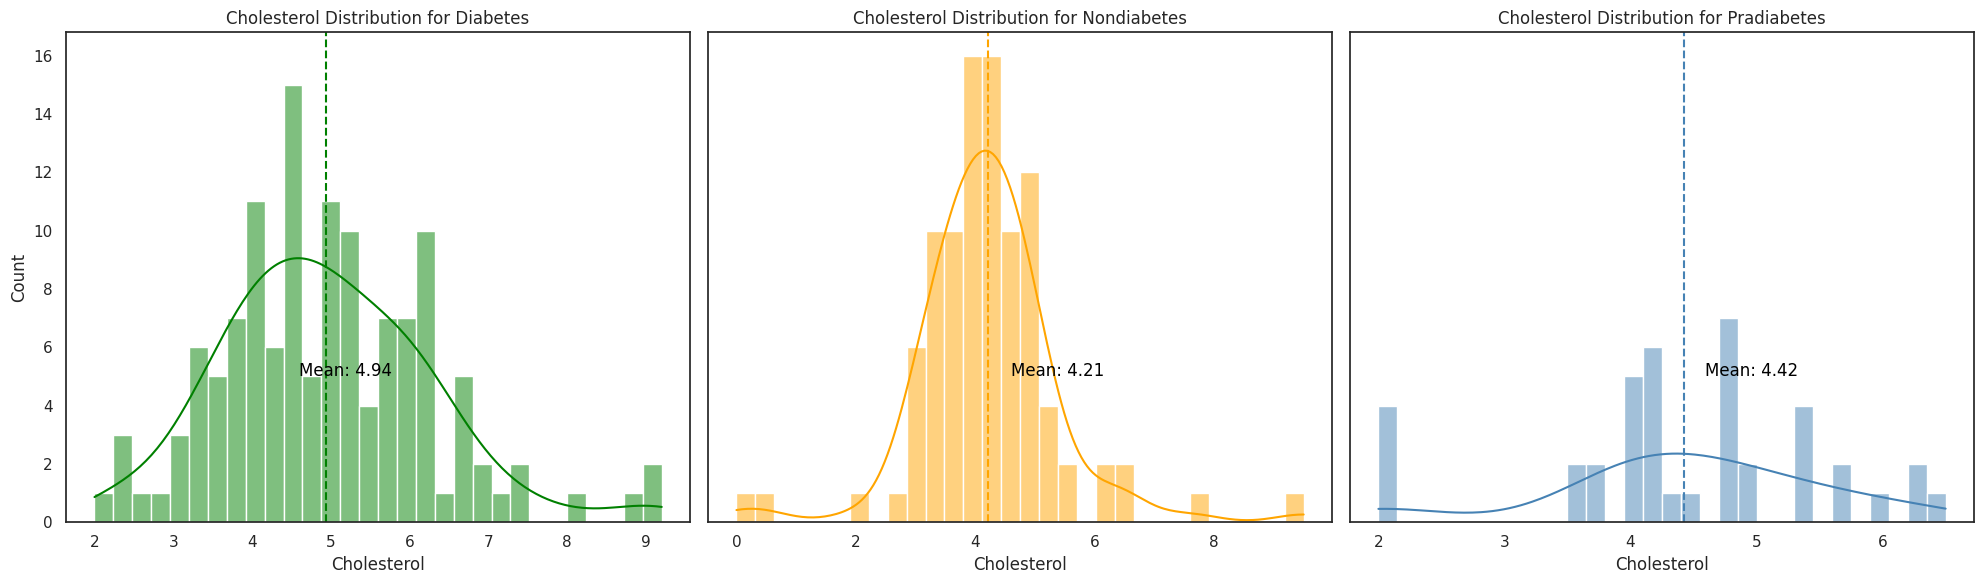

In [29]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['Cholesterol'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['Cholesterol'].mean(), color='green', linestyle='--')
axes[0].set_title('Cholesterol Distribution for Diabetes')
axes[0].set_xlabel('Cholesterol')
axes[0].set_ylabel('Count')
axes[0].text(data1['Cholesterol'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['Cholesterol'].mean():.2f}", color='black')

# 2. Grafik untuk Nondiabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['Cholesterol'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['Cholesterol'].mean(), color='orange', linestyle='--')
axes[1].set_title('Cholesterol Distribution for Nondiabetes')
axes[1].set_xlabel('Cholesterol')
axes[1].set_ylabel('Count')
axes[1].text(data1['Cholesterol'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['Cholesterol'].mean():.2f}", color='black')

# 3. Grafik untuk Pradiabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['Cholesterol'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['Cholesterol'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('Cholesterol Distribution for Pradiabetes')
axes[2].set_xlabel('Cholesterol')
axes[2].set_ylabel('Count')
axes[2].text(data1['Cholesterol'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['Cholesterol'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()


### Gender

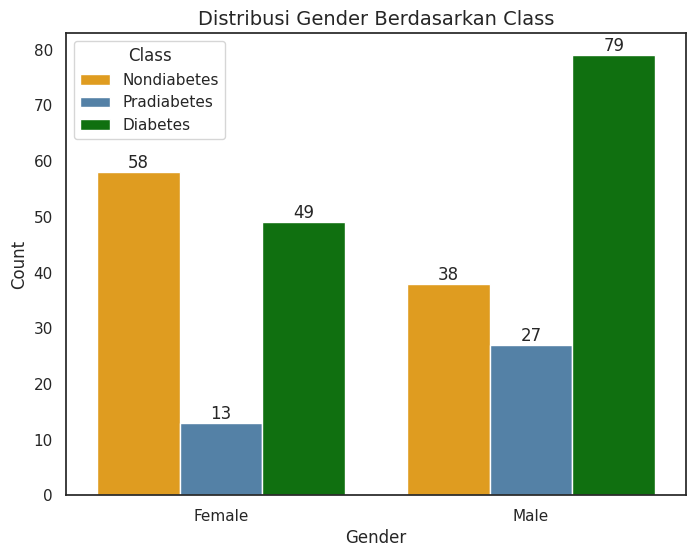

In [30]:
sns.set_style("white")

custom_palette = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data1, x='Gender', hue='Class', palette=custom_palette)

# Menambahkan angka di atas bar
for container in ax.containers:
    ax.bar_label(container)

# Menambahkan judul dan label
plt.title('Distribusi Gender Berdasarkan Class', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Class')
plt.show()

### Age

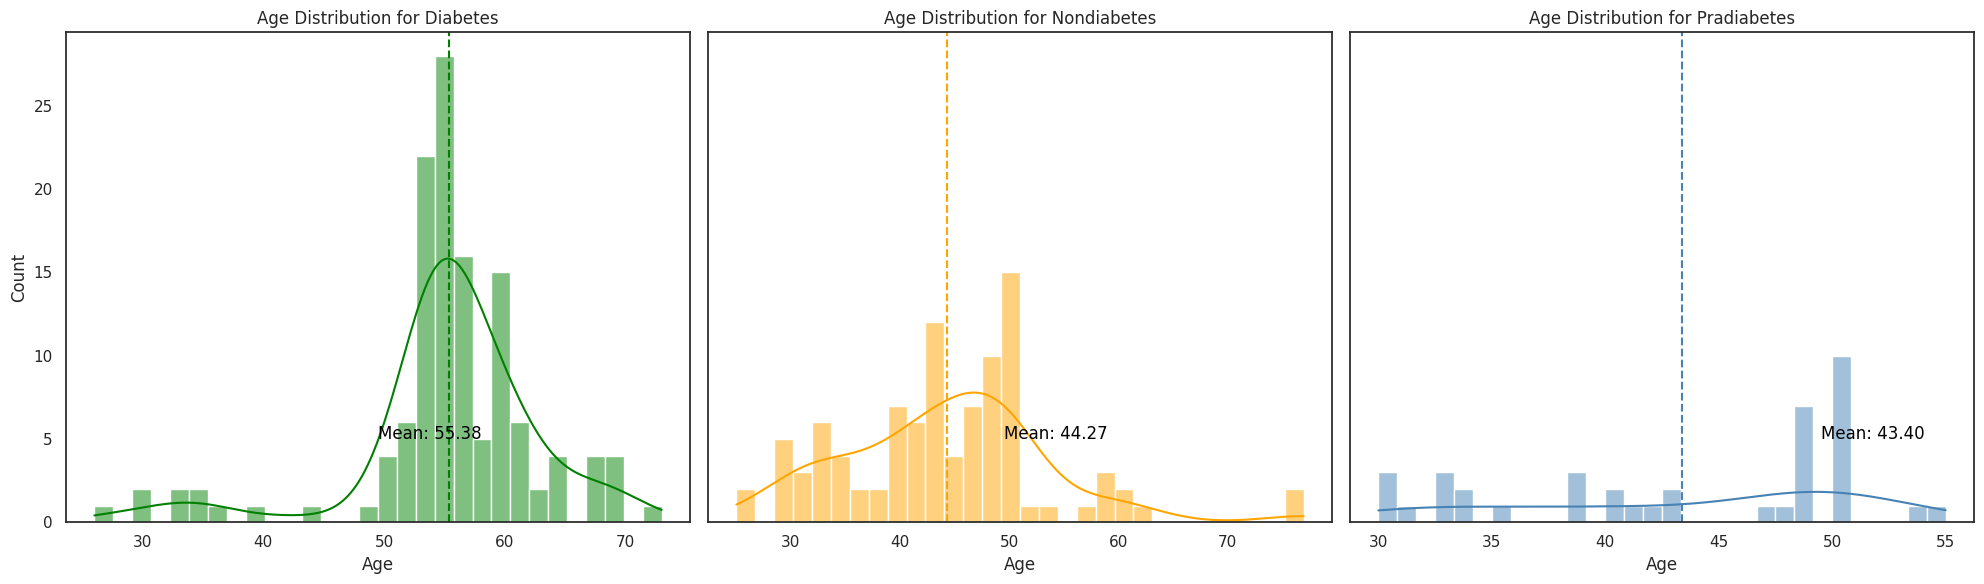

In [31]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['Age'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['Age'].mean(), color='green', linestyle='--')
axes[0].set_title('Age Distribution for Diabetes')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].text(data1['Age'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['Age'].mean():.2f}", color='black')

# 2. Grafik untuk Nondiabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['Age'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['Age'].mean(), color='orange', linestyle='--')
axes[1].set_title('Age Distribution for Nondiabetes')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
axes[1].text(data1['Age'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['Age'].mean():.2f}", color='black')

# 3. Grafik untuk Pradiabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['Age'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['Age'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('Age Distribution for Pradiabetes')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Count')
axes[2].text(data1['Age'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['Age'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

### Urea

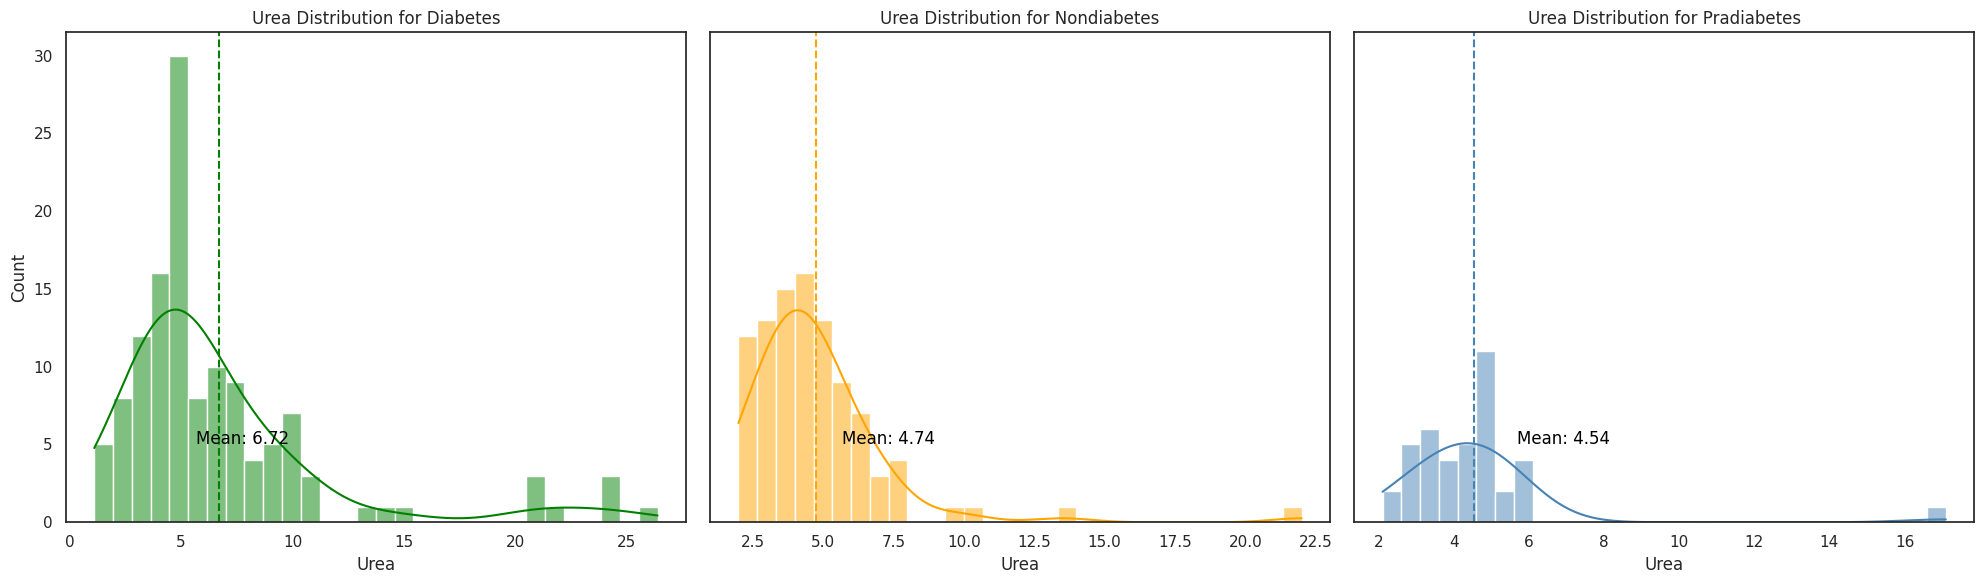

In [32]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['Urea'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['Urea'].mean(), color='green', linestyle='--')
axes[0].set_title('Urea Distribution for Diabetes')
axes[0].set_xlabel('Urea')
axes[0].set_ylabel('Count')
axes[0].text(data1['Urea'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['Urea'].mean():.2f}", color='black')

# 2. Grafik untuk Nondiabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['Urea'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['Urea'].mean(), color='orange', linestyle='--')
axes[1].set_title('Urea Distribution for Nondiabetes')
axes[1].set_xlabel('Urea')
axes[1].set_ylabel('Count')
axes[1].text(data1['Urea'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['Urea'].mean():.2f}", color='black')

# 3. Grafik untuk Pradiabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['Urea'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['Urea'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('Urea Distribution for Pradiabetes')
axes[2].set_xlabel('Urea')
axes[2].set_ylabel('Count')
axes[2].text(data1['Urea'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['Urea'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()


### HDL

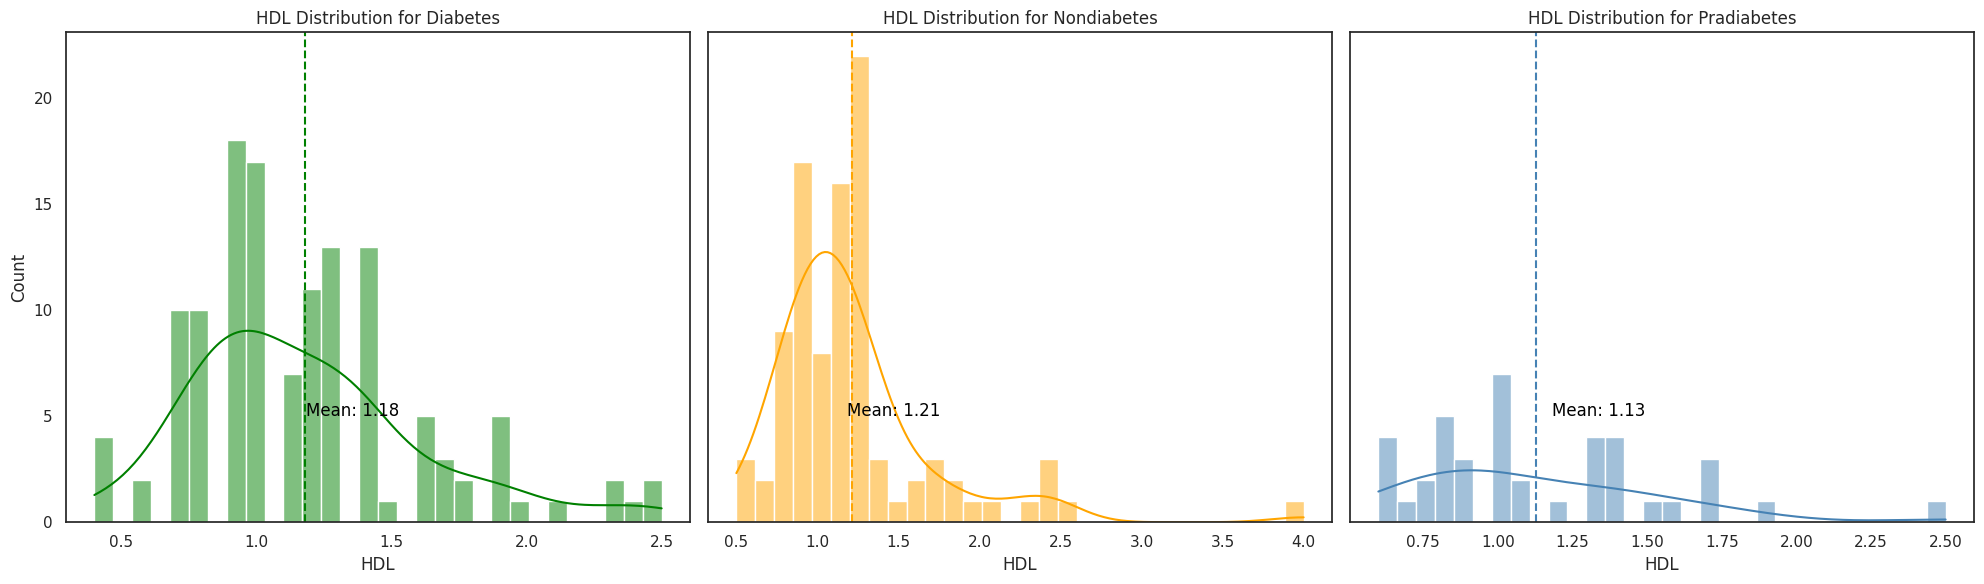

In [33]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['HDL'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['HDL'].mean(), color='green', linestyle='--')
axes[0].set_title('HDL Distribution for Diabetes')
axes[0].set_xlabel('HDL')
axes[0].set_ylabel('Count')
axes[0].text(data1['HDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['HDL'].mean():.2f}", color='black')

# 2. Grafik untuk Nondiabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['HDL'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['HDL'].mean(), color='orange', linestyle='--')
axes[1].set_title('HDL Distribution for Nondiabetes')
axes[1].set_xlabel('HDL')
axes[1].set_ylabel('Count')
axes[1].text(data1['HDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['HDL'].mean():.2f}", color='black')

# 3. Grafik untuk Pradiabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['HDL'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['HDL'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('HDL Distribution for Pradiabetes')
axes[2].set_xlabel('HDL')
axes[2].set_ylabel('Count')
axes[2].text(data1['HDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['HDL'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()


### LDL

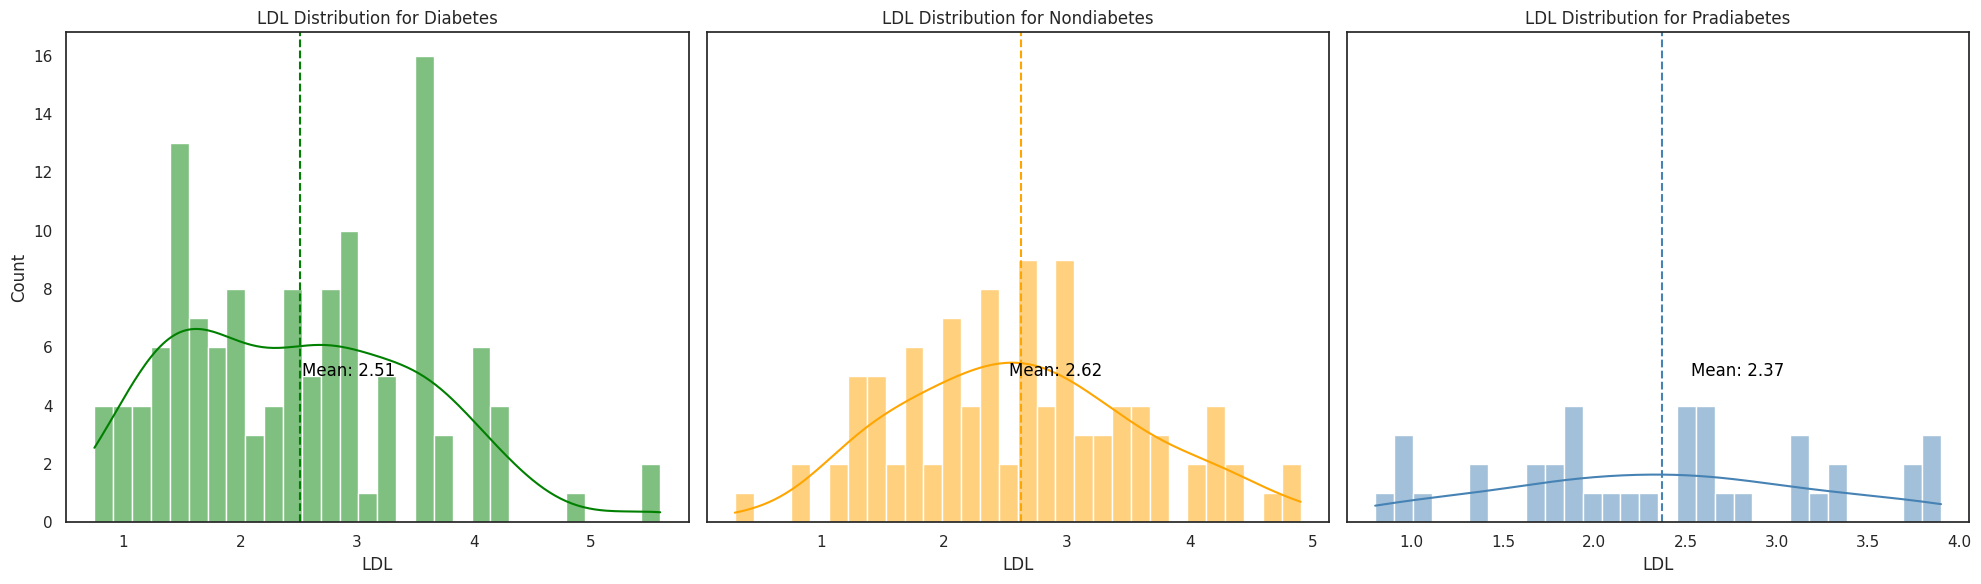

In [34]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['LDL'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['LDL'].mean(), color='green', linestyle='--')
axes[0].set_title('LDL Distribution for Diabetes')
axes[0].set_xlabel('LDL')
axes[0].set_ylabel('Count')
axes[0].text(data1['LDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['LDL'].mean():.2f}", color='black')

# 2. Grafik untuk Nondiabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['LDL'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['LDL'].mean(), color='orange', linestyle='--')
axes[1].set_title('LDL Distribution for Nondiabetes')
axes[1].set_xlabel('LDL')
axes[1].set_ylabel('Count')
axes[1].text(data1['LDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['LDL'].mean():.2f}", color='black')

# 3. Grafik untuk Pradiabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['LDL'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['LDL'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('LDL Distribution for Pradiabetes')
axes[2].set_xlabel('LDL')
axes[2].set_ylabel('Count')
axes[2].text(data1['LDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['LDL'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()


### VLDL

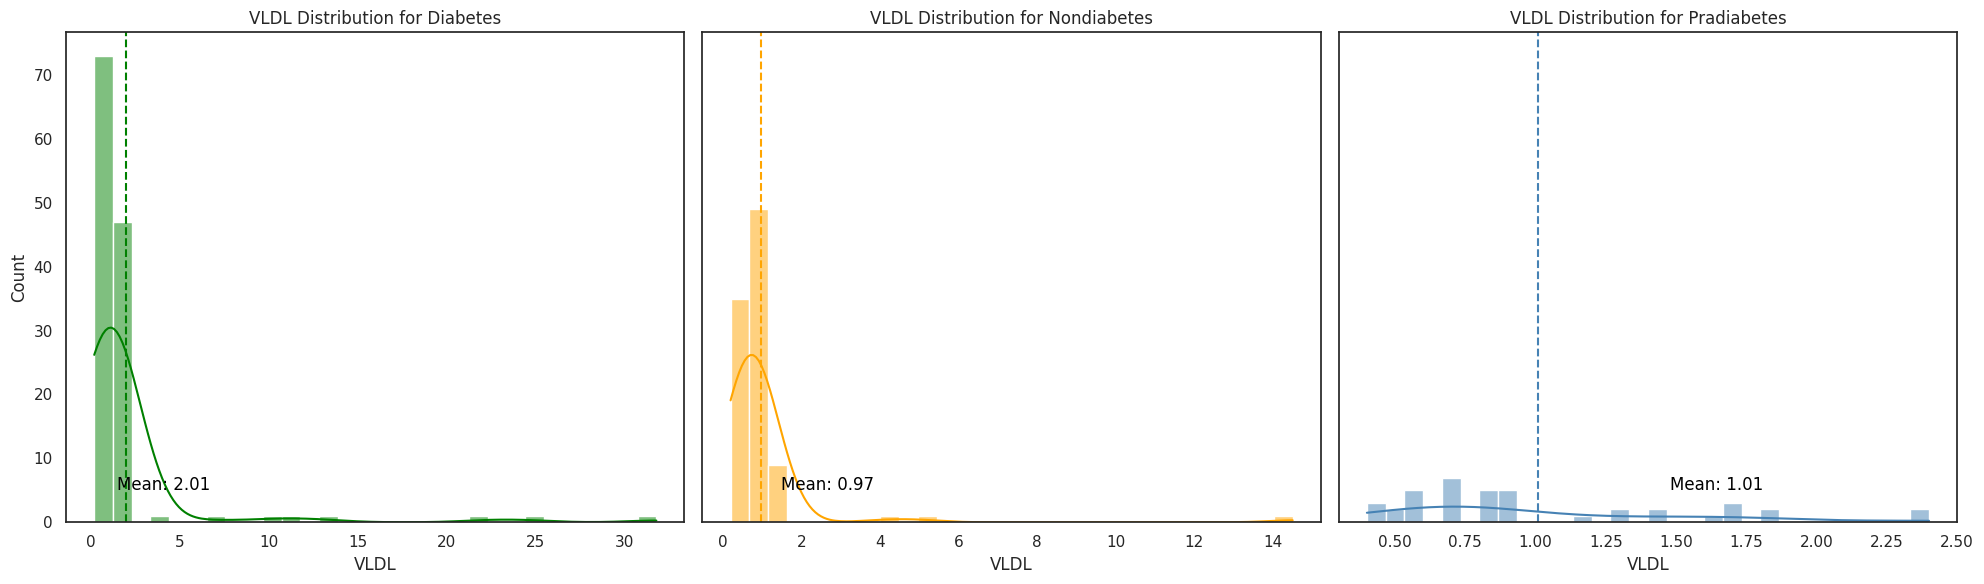

In [35]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['VLDL'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['VLDL'].mean(), color='green', linestyle='--')
axes[0].set_title('VLDL Distribution for Diabetes')
axes[0].set_xlabel('VLDL')
axes[0].set_ylabel('Count')
axes[0].text(data1['VLDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['VLDL'].mean():.2f}", color='black')

# 2. Grafik untuk Nondiabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['VLDL'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['VLDL'].mean(), color='orange', linestyle='--')
axes[1].set_title('VLDL Distribution for Nondiabetes')
axes[1].set_xlabel('VLDL')
axes[1].set_ylabel('Count')
axes[1].text(data1['VLDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['VLDL'].mean():.2f}", color='black')

# 3. Grafik untuk Pradiabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['VLDL'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['VLDL'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('VLDL Distribution for Pradiabetes')
axes[2].set_xlabel('VLDL')
axes[2].set_ylabel('Count')
axes[2].text(data1['VLDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['VLDL'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()



###HbA1c

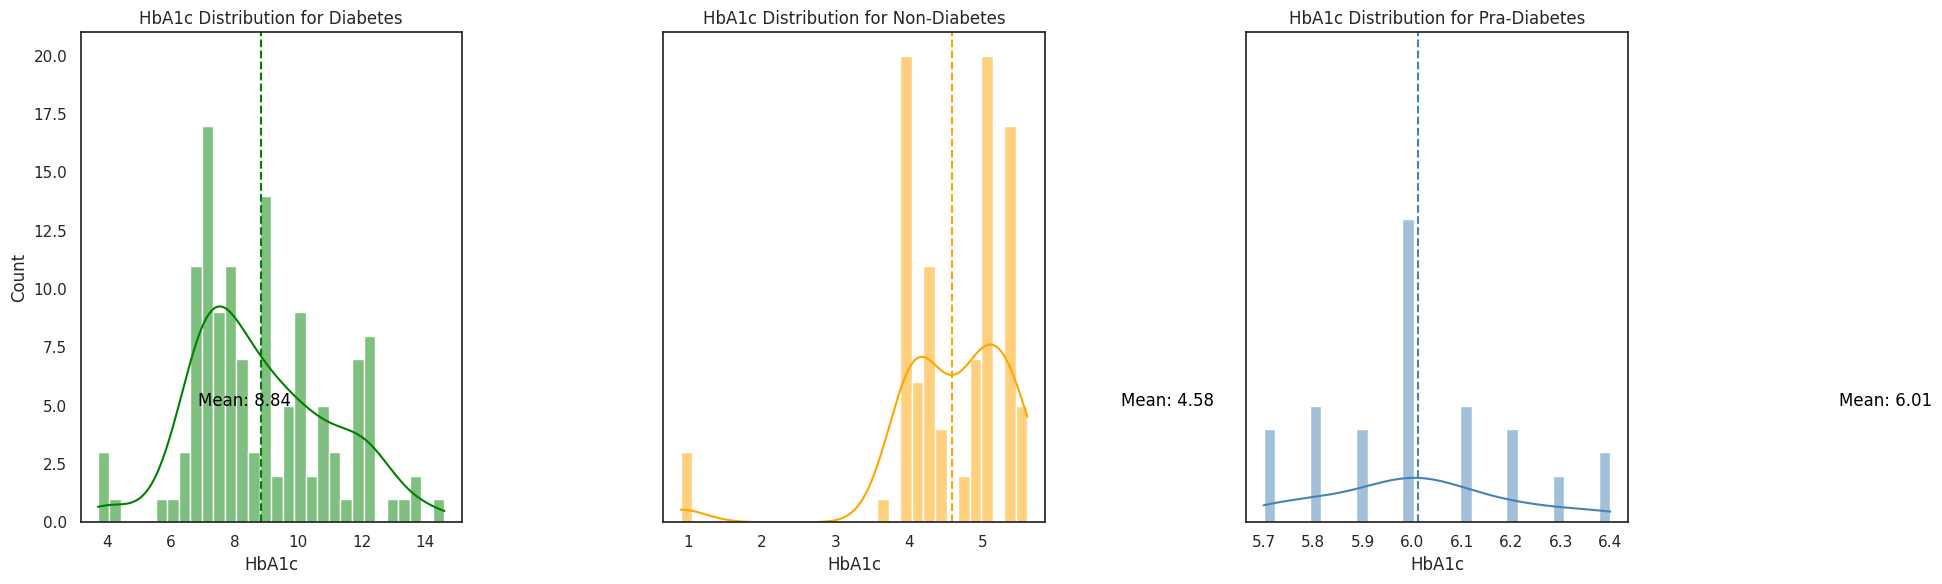

In [36]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['HbA1c'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['HbA1c'].mean(), color='green', linestyle='--')
axes[0].set_title('HbA1c Distribution for Diabetes')
axes[0].set_xlabel('HbA1c')
axes[0].set_ylabel('Count')
axes[0].text(data1['HbA1c'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['HbA1c'].mean():.2f}", color='black')

# 2. Grafik untuk Non-Diabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['HbA1c'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['HbA1c'].mean(), color='orange', linestyle='--')
axes[1].set_title('HbA1c Distribution for Non-Diabetes')
axes[1].set_xlabel('HbA1c')
axes[1].set_ylabel('Count')
axes[1].text(data1['HbA1c'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['HbA1c'].mean():.2f}", color='black')

# 3. Grafik untuk Pra-Diabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['HbA1c'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['HbA1c'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('HbA1c Distribution for Pra-Diabetes')
axes[2].set_xlabel('HbA1c')
axes[2].set_ylabel('Count')
axes[2].text(data1['HbA1c'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['HbA1c'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()


### Trigliserida

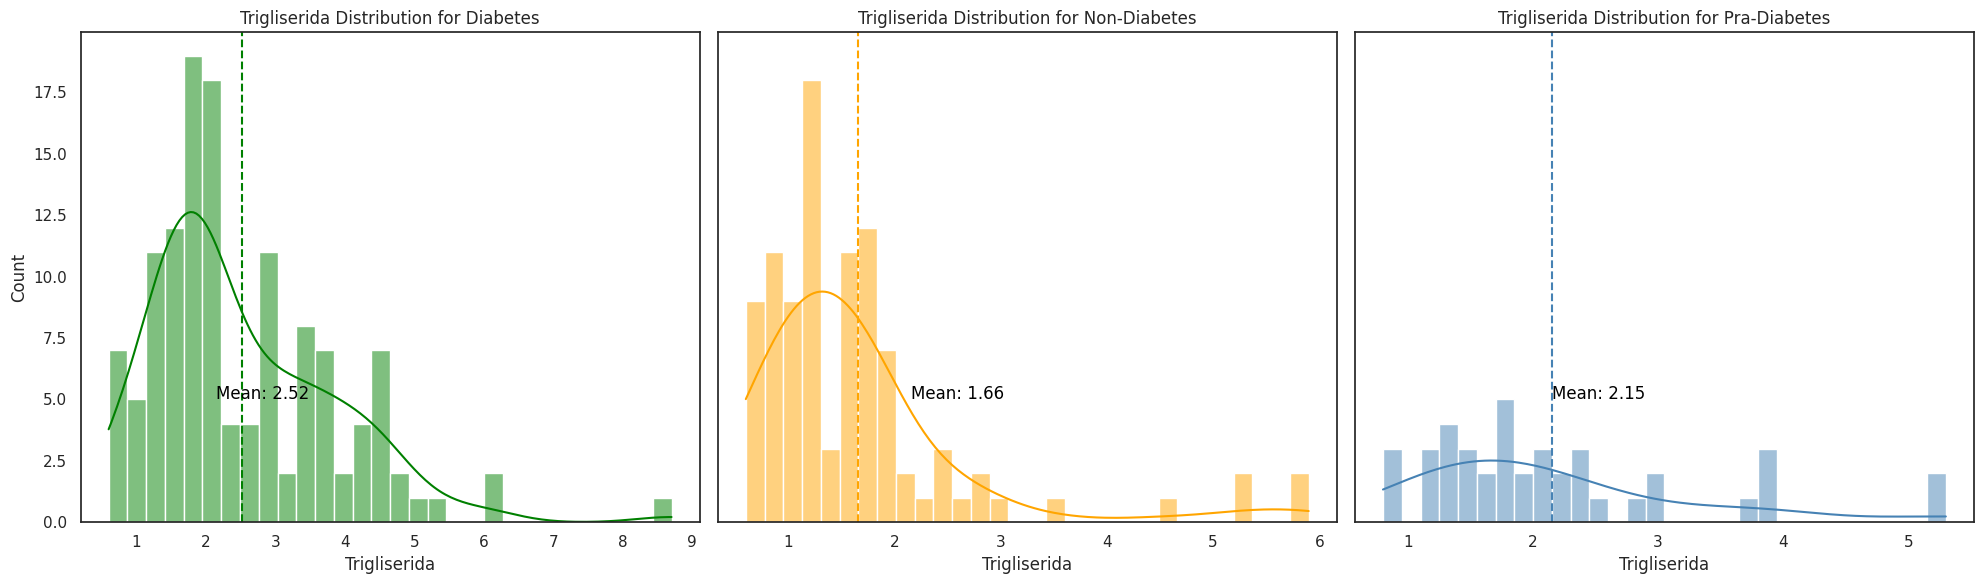

In [37]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['Trigliserida'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['Trigliserida'].mean(), color='green', linestyle='--')
axes[0].set_title('Trigliserida Distribution for Diabetes')
axes[0].set_xlabel('Trigliserida')
axes[0].set_ylabel('Count')
axes[0].text(data1['Trigliserida'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['Trigliserida'].mean():.2f}", color='black')

# 2. Grafik untuk Non-Diabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['Trigliserida'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['Trigliserida'].mean(), color='orange', linestyle='--')
axes[1].set_title('Trigliserida Distribution for Non-Diabetes')
axes[1].set_xlabel('Trigliserida')
axes[1].set_ylabel('Count')
axes[1].text(data1['Trigliserida'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['Trigliserida'].mean():.2f}", color='black')

# 3. Grafik untuk Pra-Diabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['Trigliserida'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['Trigliserida'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('Trigliserida Distribution for Pra-Diabetes')
axes[2].set_xlabel('Trigliserida')
axes[2].set_ylabel('Count')
axes[2].text(data1['Trigliserida'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['Trigliserida'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()


### BMI

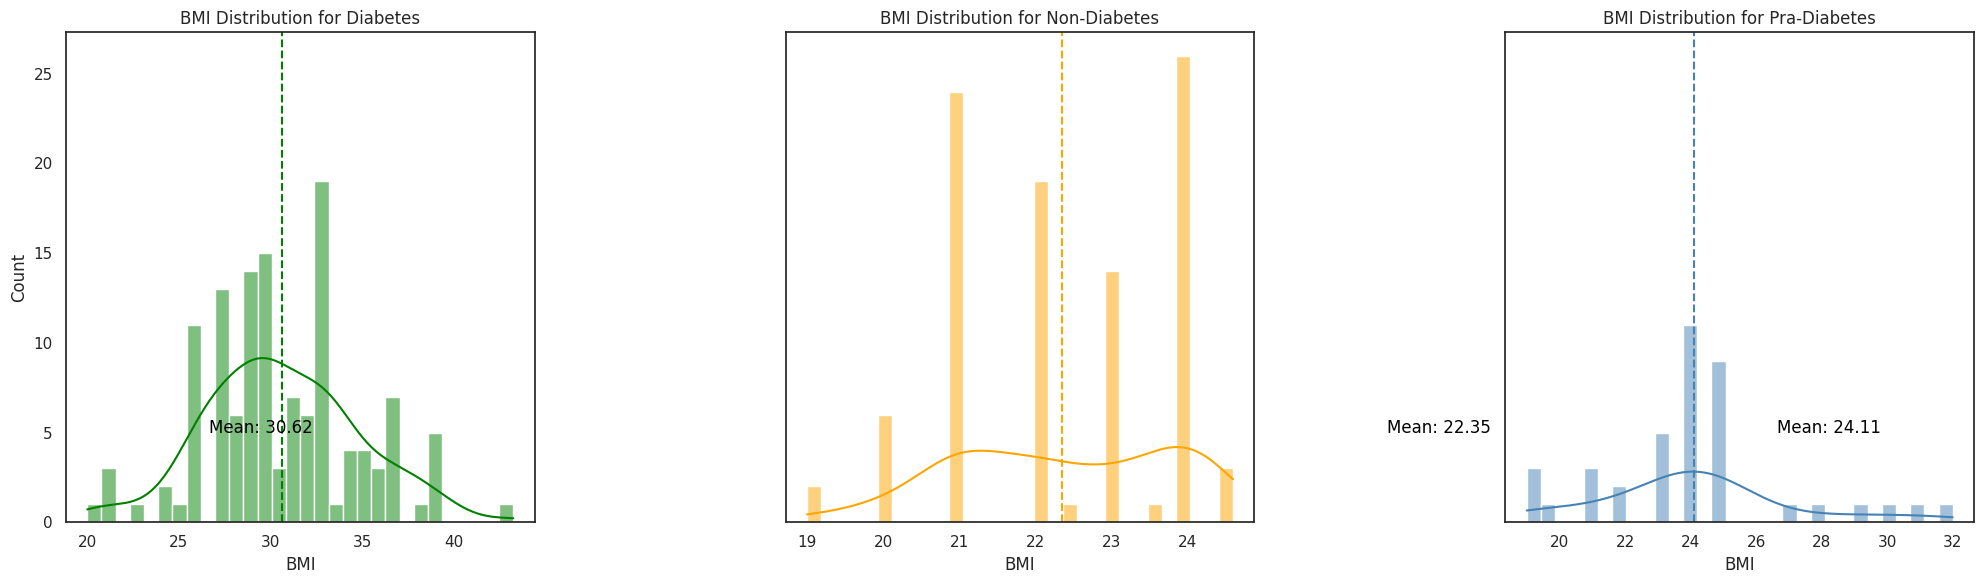

In [38]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['BMI'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['BMI'].mean(), color='green', linestyle='--')
axes[0].set_title('BMI Distribution for Diabetes')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Count')
axes[0].text(data1['BMI'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['BMI'].mean():.2f}", color='black')

# 2. Grafik untuk Non-Diabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['BMI'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['BMI'].mean(), color='orange', linestyle='--')
axes[1].set_title('BMI Distribution for Non-Diabetes')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Count')
axes[1].text(data1['BMI'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['BMI'].mean():.2f}", color='black')

# 3. Grafik untuk Pra-Diabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['BMI'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['BMI'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('BMI Distribution for Pra-Diabetes')
axes[2].set_xlabel('BMI')
axes[2].set_ylabel('Count')
axes[2].text(data1['BMI'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['BMI'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()


## Penanganan nilai 0 pada kolom cholesterol

In [39]:
chol_avg_by_LDL = data.groupby('LDL')['Cholesterol'].mean().reset_index()

def impute_chol(row, chol_avg_df):
    if row['Cholesterol'] == 0 or row['Cholesterol'] == 0.00:
        matching_row = chol_avg_df[chol_avg_df['LDL'] == row['LDL']]
        return matching_row['Cholesterol'].values[0]
    else:
        return row['Cholesterol']

data['Cholesterol'] = data.apply(lambda row: impute_chol(row, chol_avg_by_LDL), axis=1)

In [40]:
print(data[data['Cholesterol'] == 0])

Empty DataFrame
Columns: [Gender, Age, Urea, Creatine, HbA1c, Cholesterol, Trigliserida, HDL, LDL, VLDL, BMI, Class]
Index: []


In [41]:
data1.iloc[92]

,92
Gender,Male
Age,60
Urea,7.5
Creatine,70
HbA1c,0.9
Cholesterol,3.4
Trigliserida,5.3
HDL,1.1
LDL,3.6
VLDL,0.8


## Feature Selection

###Correlation Spearman Method

/tmp/ipython-input-42-1178336459.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=spearman_corr.values, y=spearman_corr.index, palette='Spectral')


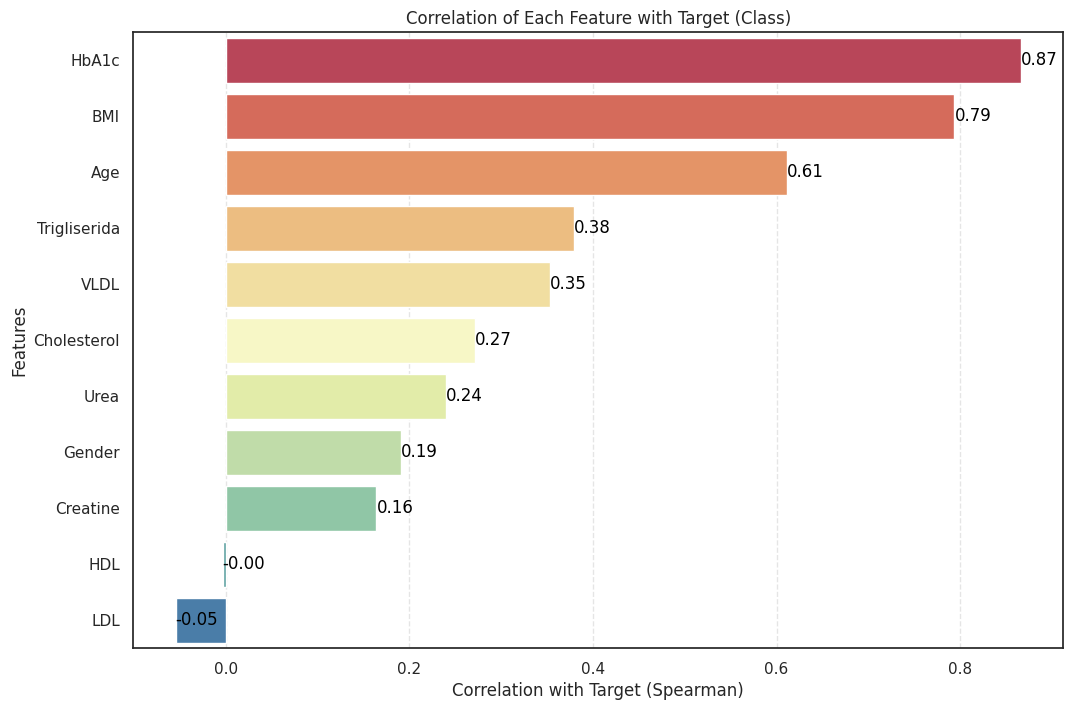

In [42]:
# Menghitung korelasi Spearman
spearman_corr = data.corr(method='spearman')['Class'].drop('Class').sort_values(ascending=False)

# Visualisasi korelasi menggunakan barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=spearman_corr.values, y=spearman_corr.index, palette='Spectral')

# Menambahkan nilai korelasi di atas setiap bar
for i, value in enumerate(spearman_corr.values):
    ax.text(value, i, f'{value:.2f}', color='black', va='center')

# Menambahkan judul dan label
plt.title('Correlation of Each Feature with Target (Class)')
plt.xlabel('Correlation with Target (Spearman)')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()


### Correlation Pearson Method

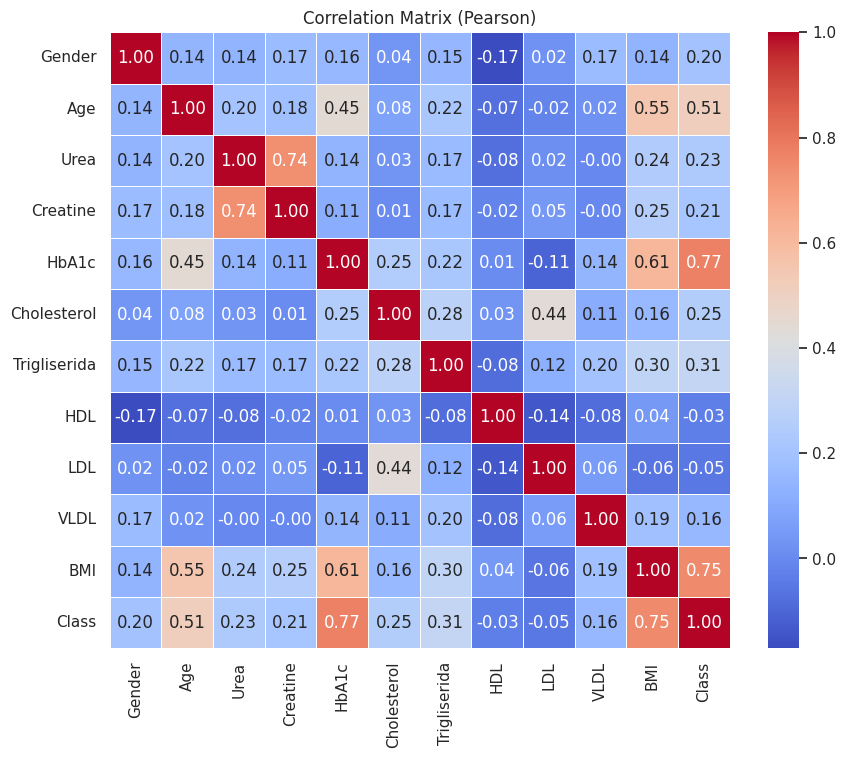

In [43]:
correlation_matrix = data.corr(method='pearson')

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Pearson)')
plt.show()

In [44]:
# Menghitung matriks korelasi Pearson
correlation_matrix = data.corr(method='pearson')

# Memfilter fitur dengan korelasi >= 0 terhadap variabel Class dan menghapus "Class" dari hasil
positive_corr = correlation_matrix['Class'][correlation_matrix['Class'] >= 0].drop('Class').sort_values(ascending=False)

# Membulatkan nilai korelasi hingga 2 angka di belakang koma
positive_corr = positive_corr.round(2)

# Membuat DataFrame untuk menampilkan hasil
positive_corr_table = positive_corr.reset_index()
positive_corr_table.columns = ['Feature', 'Value Correlation']

# Menampilkan tabel
from tabulate import tabulate
print(tabulate(positive_corr_table, headers='keys', tablefmt='pretty'))

# (Opsional) Menampilkan tabel dalam bentuk DataFrame
positive_corr_table


+---+--------------+-------------------+
|   |   Feature    | Value Correlation |
+---+--------------+-------------------+
| 0 |    HbA1c     |       0.77        |
| 1 |     BMI      |       0.75        |
| 2 |     Age      |       0.51        |
| 3 | Trigliserida |       0.31        |
| 4 | Cholesterol  |       0.25        |
| 5 |     Urea     |       0.23        |
| 6 |   Creatine   |       0.21        |
| 7 |    Gender    |        0.2        |
| 8 |     VLDL     |       0.16        |
+---+--------------+-------------------+


,Feature,Value Correlation
0,HbA1c,0.77
1,BMI,0.75
2,Age,0.51
3,Trigliserida,0.31
4,Cholesterol,0.25
5,Urea,0.23
6,Creatine,0.21
7,Gender,0.20
8,VLDL,0.16


In [45]:
# Menghitung matriks korelasi Pearson
correlation_matrix = data.corr(method='pearson')

# Memfilter fitur dengan korelasi < 0 terhadap variabel Class dan membulatkan hingga 2 angka di belakang koma
negative_corr = correlation_matrix['Class'][correlation_matrix['Class'] < 0].sort_values(ascending=False).round(2)

# Membuat DataFrame untuk menampilkan hasil
negative_corr_table = negative_corr.reset_index()
negative_corr_table.columns = ['Feature', 'Value Correlation']

# Menampilkan tabel
from tabulate import tabulate
print(tabulate(negative_corr_table, headers='keys', tablefmt='pretty'))

# (Opsional) Menampilkan tabel dalam bentuk DataFrame
negative_corr_table

+---+---------+-------------------+
|   | Feature | Value Correlation |
+---+---------+-------------------+
| 0 |   HDL   |       -0.03       |
| 1 |   LDL   |       -0.05       |
+---+---------+-------------------+


,Feature,Value Correlation
0,HDL,-0.03
1,LDL,-0.05


## Train-Test Split

In [46]:
x = data.drop(columns=["HDL","LDL","Class"])
y = data["Class"]

x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.3, random_state=42)

x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.2, random_state=42)

x3_train, x3_test, y3_train, y3_test = train_test_split(x, y, test_size=0.1, random_state=42)

### Model basic


**Final Model Accuracy:** 0.9750


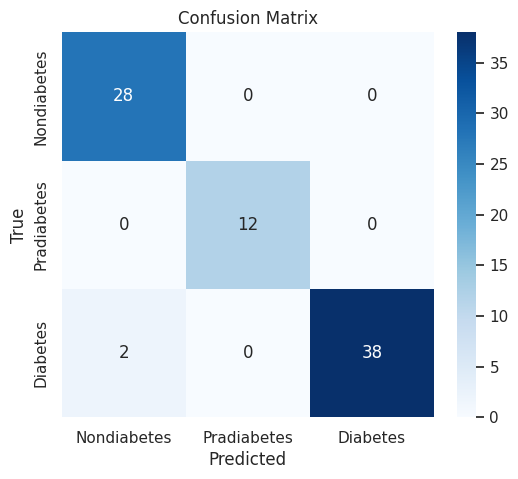


**Classification Report:**
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      1.00      1.00        12
           2       1.00      0.95      0.97        40

    accuracy                           0.97        80
   macro avg       0.98      0.98      0.98        80
weighted avg       0.98      0.97      0.98        80


**Evaluasi Model (Rata-rata Macro Avg):**
Akurasi : 0,9750
Presisi : 0,9778
Recall  : 0,9833
F1      : 0,9800


In [47]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Misal parameter optimal sudah didapatkan
model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    random_state=42
)

# Latih model dengan data training
model.fit(x1_train, y1_train)

# Prediksi data test
y1_pred = model.predict(x1_test)

# Hitung akurasi akhir
final_accuracy = accuracy_score(y1_test, y1_pred)
print(f"\n**Final Model Accuracy:** {final_accuracy:.4f}")

# Hitung confusion matrix
cm = confusion_matrix(y1_test, y1_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'],
    yticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes']
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan classification report
print("\n**Classification Report:**")
classification_rep = classification_report(y1_test, y1_pred, output_dict=True)
print(classification_report(y1_test, y1_pred))

# Ambil nilai macro average (rata-rata antar kelas)
macro = classification_rep['macro avg']

# Format angka dengan koma sebagai pemisah desimal
accuracy_str = f"{final_accuracy:.4f}".replace('.', ',')
precision_str = f"{macro['precision']:.4f}".replace('.', ',')
recall_str = f"{macro['recall']:.4f}".replace('.', ',')
f1_str = f"{macro['f1-score']:.4f}".replace('.', ',')

# Cetak hasil evaluasi macro average
print("\n**Evaluasi Model (Rata-rata Macro Avg):**")
print(f"Akurasi : {accuracy_str}")
print(f"Presisi : {precision_str}")
print(f"Recall  : {recall_str}")
print(f"F1      : {f1_str}")

### Model basic 2


**Final Model Accuracy (Skenario 2):** 1.0000


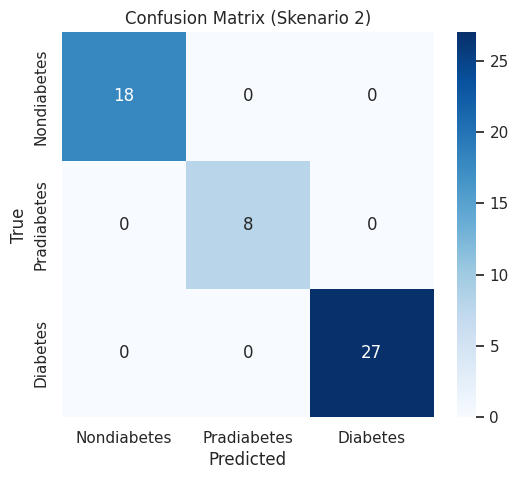


**Classification Report (Skenario 2):**
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        27

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53


**Evaluasi Model (Rata-rata Macro Avg) Skenario 2:**
Akurasi : 1,0000
Presisi : 1,0000
Recall  : 1,0000
F1      : 1,0000


In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Misal parameter optimal sudah didapatkan (gunakan parameter yang sesuai skenario 2)
model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    random_state=42
)

# Latih model dengan data training skenario 2
model.fit(x2_train, y2_train)

# Prediksi data test skenario 2
y2_pred = model.predict(x2_test)

# Hitung akurasi akhir
final_accuracy = accuracy_score(y2_test, y2_pred)
print(f"\n**Final Model Accuracy (Skenario 2):** {final_accuracy:.4f}")

# Hitung confusion matrix
cm = confusion_matrix(y2_test, y2_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'],
    yticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes']
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Skenario 2)')
plt.show()

# Tampilkan classification report
print("\n**Classification Report (Skenario 2):**")
classification_rep = classification_report(y2_test, y2_pred, output_dict=True)
print(classification_report(y2_test, y2_pred))

# Ambil nilai macro average (rata-rata antar kelas)
macro = classification_rep['macro avg']

# Format angka dengan koma sebagai pemisah desimal
accuracy_str = f"{final_accuracy:.4f}".replace('.', ',')
precision_str = f"{macro['precision']:.4f}".replace('.', ',')
recall_str = f"{macro['recall']:.4f}".replace('.', ',')
f1_str = f"{macro['f1-score']:.4f}".replace('.', ',')

# Cetak hasil evaluasi macro average
print("\n**Evaluasi Model (Rata-rata Macro Avg) Skenario 2:**")
print(f"Akurasi : {accuracy_str}")
print(f"Presisi : {precision_str}")
print(f"Recall  : {recall_str}")
print(f"F1      : {f1_str}")


### Model basic 3

CV Accuracy per fold: [1.         1.         0.875      0.95833333 0.95833333 1.
 1.         1.         1.         0.95652174]
Mean CV Accuracy: 0.9748

**Final Model Accuracy (Skenario 3):** 1.0000


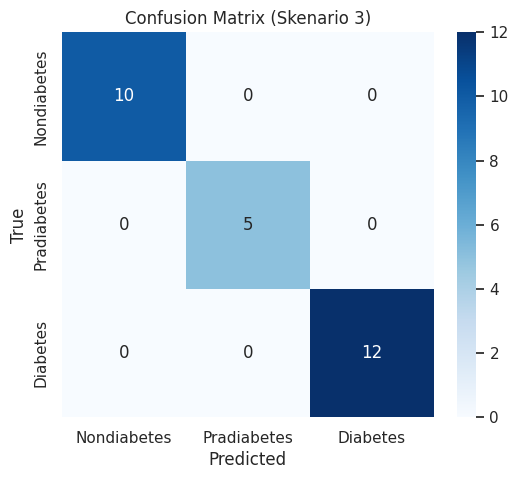


**Classification Report (Skenario 3):**
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        12

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27


**Evaluasi Model (Rata-rata Macro Avg) Skenario 3:**
Akurasi : 1,0000
Presisi : 1,0000
Recall  : 1,0000
F1      : 1,0000


In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definisikan model dengan parameter yang sama
model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    random_state=42
)

# Lakukan 10-Fold Cross Validation pada data training
cv_scores = cross_val_score(model, x3_train, y3_train, cv=10, scoring='accuracy')
print(f"CV Accuracy per fold: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

# Latih model final dengan seluruh data training
model.fit(x3_train, y3_train)

# Prediksi data test
y3_pred = model.predict(x3_test)

# Hitung akurasi akhir pada test set
final_accuracy = accuracy_score(y3_test, y3_pred)
print(f"\n**Final Model Accuracy (Skenario 3):** {final_accuracy:.4f}")

# Hitung confusion matrix
cm = confusion_matrix(y3_test, y3_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'],
    yticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes']
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Skenario 3)')
plt.show()

# Tampilkan classification report
print("\n**Classification Report (Skenario 3):**")
classification_rep = classification_report(y3_test, y3_pred, output_dict=True)
print(classification_report(y3_test, y3_pred))

# Ambil nilai macro average (rata-rata antar kelas)
macro = classification_rep['macro avg']

# Format angka dengan koma sebagai pemisah desimal
accuracy_str = f"{final_accuracy:.4f}".replace('.', ',')
precision_str = f"{macro['precision']:.4f}".replace('.', ',')
recall_str = f"{macro['recall']:.4f}".replace('.', ',')
f1_str = f"{macro['f1-score']:.4f}".replace('.', ',')

# Cetak hasil evaluasi macro average
print("\n**Evaluasi Model (Rata-rata Macro Avg) Skenario 3:**")
print(f"Akurasi : {accuracy_str}")
print(f"Presisi : {precision_str}")
print(f"Recall  : {recall_str}")
print(f"F1      : {f1_str}")


# Modelling


### COBA Cross VAL

In [50]:
%%time

from sklearn.metrics import accuracy_score
from pyswarm import pso
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Fungsi Objektif untuk PSO tanpa splitting manual
def pso_objective(params):
    n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma = params

    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    learning_rate = float(learning_rate)
    subsample = float(subsample)
    colsample_bytree = float(colsample_bytree)
    gamma = float(gamma)

    model1 = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        random_state=42,
    )

    # Langsung cross-validation 10-fold pada seluruh dataset (x1, y1)
    cv_scores = cross_val_score(model1, x, y, cv=10, scoring='accuracy')

    return 1 - np.mean(cv_scores)

# Rentang Parameter yang Dioptimalkan
bounds = [
    (10, 200),      # n_estimators
    (3, 15),        # max_depth
    (0.01, 0.3),    # learning_rate
    (0.6, 1.0),     # subsample
    (0.6, 1.0),     # colsample_bytree
    (0, 5)          # gamma
]

# Jalankan PSO
optimal_params, optimal_score = pso(
    pso_objective,
    lb=[b[0] for b in bounds],
    ub=[b[1] for b in bounds],
    swarmsize=20,
    maxiter=150,
    omega=0.9,
    phip=1.5,
    phig=1.5
)

print("\nOptimal Parameters:")
print(f"n_estimators: {int(optimal_params[0])}")
print(f"max_depth: {int(optimal_params[1])}")
print(f"learning_rate: {optimal_params[2]:.3f}")
print(f"subsample: {optimal_params[3]:.2f}")
print(f"colsample_bytree: {optimal_params[4]:.2f}")
print(f"gamma: {optimal_params[5]:.2f}")

print("\nOptimal Accuracy:", 1 - optimal_score)


Stopping search: maximum iterations reached --> 150

Optimal Parameters:
n_estimators: 10
max_depth: 4
learning_rate: 0.233
subsample: 0.97
colsample_bytree: 1.00
gamma: 0.00

Optimal Accuracy: 0.9850427350427351
CPU times: user 33min 11s, sys: 40.8 s, total: 33min 52s
Wall time: 20min 12s



**Final Model Accuracy (10-fold CV):** 0.9848


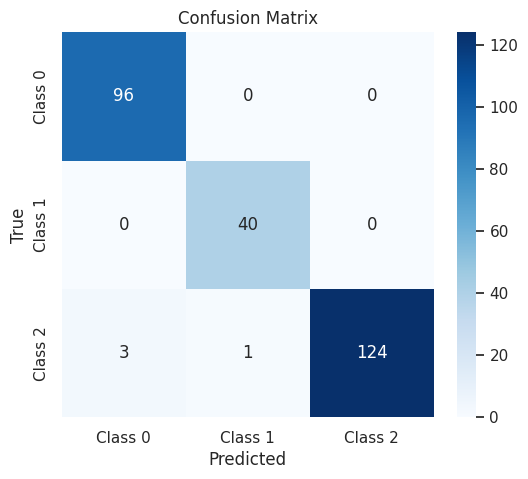


**Classification Report (10-fold CV):**
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       0.98      1.00      0.99        40
           2       1.00      0.97      0.98       128

    accuracy                           0.98       264
   macro avg       0.98      0.99      0.99       264
weighted avg       0.99      0.98      0.98       264


**Evaluasi Model (Rata-rata Macro Avg):**
Akurasi : 0,9848
Presisi : 0,9818
Recall  : 0,9896
F1      : 0,9855
CPU times: user 635 ms, sys: 11 ms, total: 646 ms
Wall time: 425 ms


In [51]:
%%time

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ambil parameter optimal yang sudah ditemukan
optimal_n_estimators = int(optimal_params[0])
optimal_max_depth = int(optimal_params[1])
optimal_learning_rate = float(optimal_params[2])
optimal_subsample = float(optimal_params[3])
optimal_colsample_bytree = float(optimal_params[4])
optimal_gamma = float(optimal_params[5])

# Inisialisasi Model XGBoost dengan parameter optimal
model = XGBClassifier(
    n_estimators=optimal_n_estimators,
    max_depth=optimal_max_depth,
    learning_rate=optimal_learning_rate,
    subsample=optimal_subsample,
    colsample_bytree=optimal_colsample_bytree,
    gamma=optimal_gamma,
    random_state=42
)

# Menggunakan cross_val_predict untuk mendapatkan prediksi pada setiap fold
y_pred = cross_val_predict(model, x, y, cv=10)

# Evaluasi model
accuracy = accuracy_score(y, y_pred)
print(f"\n**Final Model Accuracy (10-fold CV):** {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n**Classification Report (10-fold CV):**")
classification_rep = classification_report(y, y_pred, output_dict=True)
print(classification_report(y, y_pred))

# Ambil nilai macro average (rata-rata antar kelas)
macro = classification_rep['macro avg']

# Format angka dengan koma sebagai pemisah desimal
accuracy_str = f"{accuracy:.4f}".replace('.', ',')
precision_str = f"{macro['precision']:.4f}".replace('.', ',')
recall_str = f"{macro['recall']:.4f}".replace('.', ',')
f1_str = f"{macro['f1-score']:.4f}".replace('.', ',')

# Menampilkan hasil evaluasi macro average
print("\n**Evaluasi Model (Rata-rata Macro Avg):**")
print(f"Akurasi : {accuracy_str}")
print(f"Presisi : {precision_str}")
print(f"Recall  : {recall_str}")
print(f"F1      : {f1_str}")


## Skenario 1

### Optimize parameter with PSO

In [52]:
%%time

from sklearn.metrics import accuracy_score
from pyswarm import pso
from xgboost import XGBClassifier

# Fungsi Objektif untuk PSO
def pso_objective(params):
    n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma = params

    # Pastikan parameter dalam rentang yang valid
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    learning_rate = float(learning_rate)
    subsample = float(subsample)
    colsample_bytree = float(colsample_bytree)
    gamma = float(gamma)

    # Inisialisasi Model XGBoost
    model1 = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        random_state=42
    )

    # Melatih Model
    model1.fit(x1_train, y1_train)

    # Prediksi dan Evaluasi
    y1_pred = model1.predict(x1_test)
    accuracy_1 = accuracy_score(y1_test, y1_pred)

    return 1 - accuracy_1  # Minimalkan error rate


# Rentang Parameter yang Dioptimalkan
bounds = [
    (10, 200),      # n_estimators
    (3, 15),        # max_depth
    (0.01, 0.3),    # learning_rate
    (0.6, 1.0),     # subsample
    (0.6, 1.0),     # colsample_bytree
    (0, 5)          # gamma
]

# Jalankan PSO untuk menemukan parameter terbaik
optimal_params, optimal_score = pso(
    pso_objective,
    lb=[b[0] for b in bounds],
    ub=[b[1] for b in bounds],
    swarmsize=20,
    maxiter=150,
    omega=0.9,
    phip=1.5,
    phig=1.5
)

# Hasil Optimal
print("\nOptimal Parameters:")
print(f"n_estimators: {int(optimal_params[0])}")
print(f"max_depth: {int(optimal_params[1])}")
print(f"learning_rate: {optimal_params[2]:.3f}")
print(f"subsample: {optimal_params[3]:.2f}")
print(f"colsample_bytree: {optimal_params[4]:.2f}")
print(f"gamma: {optimal_params[5]:.2f}")

print("\nOptimal Accuracy:", 1 - optimal_score)


Stopping search: maximum iterations reached --> 150

Optimal Parameters:
n_estimators: 93
max_depth: 11
learning_rate: 0.300
subsample: 1.00
colsample_bytree: 0.60
gamma: 0.00

Optimal Accuracy: 0.9875
CPU times: user 5min 49s, sys: 11 s, total: 6min
Wall time: 3min 31s


### Model with optimize parameter


**Final Model Accuracy:** 0.9875


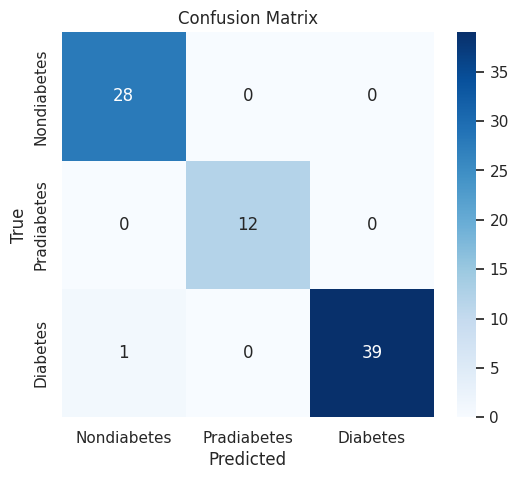


**Classification Report:**
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      1.00      1.00        12
           2       1.00      0.97      0.99        40

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80


**Evaluasi Model (Rata-rata Macro Avg):**
Akurasi : 0,9875
Presisi : 0,9885
Recall  : 0,9917
F1      : 0,9899


In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil parameter optimal yang sudah ditemukan
optimal_n_estimators = int(optimal_params[0])
optimal_max_depth = int(optimal_params[1])
optimal_learning_rate = float(optimal_params[2])
optimal_subsample = float(optimal_params[3])
optimal_colsample_bytree = float(optimal_params[4])
optimal_gamma = float(optimal_params[5])

# Inisialisasi Model XGBoost dengan parameter optimal
final_xgb_model = XGBClassifier(
    n_estimators=optimal_n_estimators,
    max_depth=optimal_max_depth,
    learning_rate=optimal_learning_rate,
    subsample=optimal_subsample,
    colsample_bytree=optimal_colsample_bytree,
    gamma=optimal_gamma,
    random_state=42
)

# Melatih Model dengan Parameter Optimal
final_xgb_model.fit(x1_train, y1_train)

# Prediksi pada Data Uji
y1_pred = final_xgb_model.predict(x1_test)

# Evaluasi Model
final_accuracy = accuracy_score(y1_test, y1_pred)
print(f"\n**Final Model Accuracy:** {final_accuracy:.4f}")

cm = confusion_matrix(y1_test, y1_pred)

# Plot Matriks Kebingungan
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'], yticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Laporan Klasifikasi
print("\n**Classification Report:**")
classification_rep = classification_report(y1_test, y1_pred, output_dict=True)
print(classification_report(y1_test, y1_pred))

# Evaluasi Model
final_accuracy = accuracy_score(y1_test, y1_pred)

# Ambil macro avg
macro = classification_rep['macro avg']

# Format angka dengan koma sebagai pemisah desimal
accuracy_str = f"{final_accuracy:.4f}".replace('.', ',')
precision_str = f"{macro['precision']:.4f}".replace('.', ',')
recall_str = f"{macro['recall']:.4f}".replace('.', ',')
f1_str = f"{macro['f1-score']:.4f}".replace('.', ',')

print("\n**Evaluasi Model (Rata-rata Macro Avg):**")
print(f"Akurasi : {accuracy_str}")
print(f"Presisi : {precision_str}")
print(f"Recall  : {recall_str}")
print(f"F1      : {f1_str}")


## Skenario 2

### PSO Model

In [54]:
%%time

from sklearn.metrics import accuracy_score
from pyswarm import pso
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Fungsi Objektif untuk PSO
def pso_objective(params):
    n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma = params

    # Pastikan parameter dalam rentang yang valid
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    learning_rate = float(learning_rate)
    subsample = float(subsample)
    colsample_bytree = float(colsample_bytree)
    gamma = float(gamma)

    # Inisialisasi Model XGBoost
    model2 = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        random_state=42
    )

     # Melatih Model
    model2.fit(x2_train, y2_train)

    # Prediksi dan Evaluasi
    y2_pred = model2.predict(x2_test)
    accuracy_2 = accuracy_score(y2_test, y2_pred)

    return 1 - accuracy_2  # Minimalkan error rate


# Rentang Parameter yang Dioptimalkan
bounds = [
    (10, 200),      # n_estimators
    (3, 15),        # max_depth
    (0.01, 0.3),    # learning_rate
    (0.6, 1.0),     # subsample
    (0.6, 1.0),     # colsample_bytree
    (0, 5)          # gamma
]

# Jalankan PSO untuk menemukan parameter terbaik
optimal_params, optimal_score = pso(
    pso_objective,
    lb=[b[0] for b in bounds],
    ub=[b[1] for b in bounds],
    swarmsize=20,
    maxiter=150,
    omega=0.9,
    phip=1.5,
    phig=1.5
)

# Hasil Optimal
print("\nOptimal Parameters:")
print(f"n_estimators: {int(optimal_params[0])}")
print(f"max_depth: {int(optimal_params[1])}")
print(f"learning_rate: {optimal_params[2]:.3f}")
print(f"subsample: {optimal_params[3]:.2f}")
print(f"colsample_bytree: {optimal_params[4]:.2f}")
print(f"gamma: {optimal_params[5]:.2f}")

print("\nOptimal Accuracy:", 1 - optimal_score)


Stopping search: maximum iterations reached --> 150

Optimal Parameters:
n_estimators: 12
max_depth: 8
learning_rate: 0.011
subsample: 0.93
colsample_bytree: 0.86
gamma: 0.02

Optimal Accuracy: 1.0
CPU times: user 4min 36s, sys: 7.77 s, total: 4min 44s
Wall time: 2min 44s


### Model With PSO

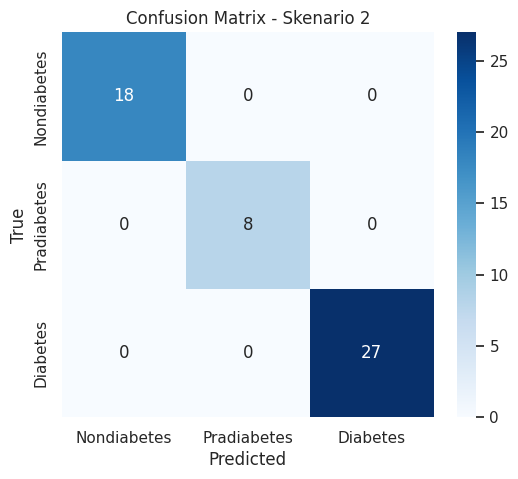


**Classification Report for Skenario 2:**
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        27

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53


**Evaluasi Model Skenario 2 (Rata-rata Macro Avg):**
Akurasi : 1,0000
Presisi : 1,0000
Recall  : 1,0000
F1      : 1,0000


In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil parameter optimal yang sudah ditemukan untuk Skenario 2
optimal_n_estimators = int(optimal_params[0])
optimal_max_depth = int(optimal_params[1])
optimal_learning_rate = float(optimal_params[2])
optimal_subsample = float(optimal_params[3])
optimal_colsample_bytree = float(optimal_params[4])
optimal_gamma = float(optimal_params[5])

# Inisialisasi Model XGBoost dengan parameter optimal
final_xgb_model = XGBClassifier(
    n_estimators=optimal_n_estimators,
    max_depth=optimal_max_depth,
    learning_rate=optimal_learning_rate,
    subsample=optimal_subsample,
    colsample_bytree=optimal_colsample_bytree,
    gamma=optimal_gamma,
    random_state=42
)

# Melatih Model dengan Parameter Optimal untuk Skenario 2
final_xgb_model.fit(x2_train, y2_train)

# Prediksi pada Data Uji untuk Skenario 2
y2_pred = final_xgb_model.predict(x2_test)

# Matriks Kebingungannya untuk Skenario 2
cm = confusion_matrix(y2_test, y2_pred)

# Plot Matriks Kebingungannya
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'], yticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Skenario 2')
plt.show()

# Laporan Klasifikasi untuk Skenario 2
print("\n**Classification Report for Skenario 2:**")
classification_rep = classification_report(y2_test, y2_pred, output_dict=True)
print(classification_report(y2_test, y2_pred))

# Evaluasi Model untuk Skenario 2
final_accuracy = accuracy_score(y2_test, y2_pred)

# Ambil macro avg dari laporan klasifikasi
macro = classification_rep['macro avg']

# Format angka dengan koma sebagai pemisah desimal
accuracy_str = f"{final_accuracy:.4f}".replace('.', ',')
precision_str = f"{macro['precision']:.4f}".replace('.', ',')
recall_str = f"{macro['recall']:.4f}".replace('.', ',')
f1_str = f"{macro['f1-score']:.4f}".replace('.', ',')

print("\n**Evaluasi Model Skenario 2 (Rata-rata Macro Avg):**")
print(f"Akurasi : {accuracy_str}")
print(f"Presisi : {precision_str}")
print(f"Recall  : {recall_str}")
print(f"F1      : {f1_str}")


In [56]:
import joblib

joblib.dump(final_xgb_model, "xgboost.pkl")

['xgboost.pkl']

## Skenario 3

### PSO Model

In [57]:
%%time

from sklearn.metrics import accuracy_score
from pyswarm import pso
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Fungsi Objektif untuk PSO
def pso_objective(params):
    n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma = params

    # Pastikan parameter dalam rentang yang valid
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    learning_rate = float(learning_rate)
    subsample = float(subsample)
    colsample_bytree = float(colsample_bytree)
    gamma = float(gamma)

    # Inisialisasi Model XGBoost
    model3 = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        random_state=42
    )

     # Melatih Model
    model3.fit(x3_train, y3_train)

    # Prediksi dan Evaluasi
    y3_pred = model3.predict(x3_test)
    accuracy_3 = accuracy_score(y3_test, y3_pred)

    return 1 - accuracy_3  # Minimalkan error rate


# Rentang Parameter yang Dioptimalkan
bounds = [
    (10, 200),      # n_estimators
    (3, 15),        # max_depth
    (0.01, 0.3),    # learning_rate
    (0.6, 1.0),     # subsample
    (0.6, 1.0),     # colsample_bytree
    (0, 5)          # gamma
]

# Jalankan PSO untuk menemukan parameter terbaik
optimal_params, optimal_score = pso(
    pso_objective,
    lb=[b[0] for b in bounds],
    ub=[b[1] for b in bounds],
    swarmsize=20,
    maxiter=150,
    omega=0.9,
    phip=1.5,
    phig=1.5
)

# Hasil Optimal
print("\nOptimal Parameters:")
print(f"n_estimators: {int(optimal_params[0])}")
print(f"max_depth: {int(optimal_params[1])}")
print(f"learning_rate: {optimal_params[2]:.3f}")
print(f"subsample: {optimal_params[3]:.2f}")
print(f"colsample_bytree: {optimal_params[4]:.2f}")
print(f"gamma: {optimal_params[5]:.2f}")

print("\nOptimal Accuracy:", 1 - optimal_score)


Stopping search: maximum iterations reached --> 150

Optimal Parameters:
n_estimators: 142
max_depth: 9
learning_rate: 0.108
subsample: 0.88
colsample_bytree: 0.97
gamma: 0.20

Optimal Accuracy: 1.0
CPU times: user 7min 12s, sys: 12.6 s, total: 7min 24s
Wall time: 4min 20s


### Model With PSO

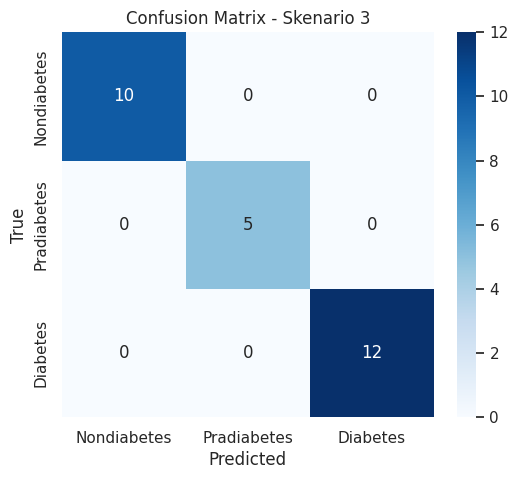


**Classification Report for Skenario 3:**
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        12

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27


**Evaluasi Model Skenario 3 (Rata-rata Macro Avg):**
Akurasi : 1,0000
Presisi : 1,0000
Recall  : 1,0000
F1      : 1,0000


In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil parameter optimal yang sudah ditemukan untuk Skenario 3
optimal_n_estimators = int(optimal_params[0])
optimal_max_depth = int(optimal_params[1])
optimal_learning_rate = float(optimal_params[2])
optimal_subsample = float(optimal_params[3])
optimal_colsample_bytree = float(optimal_params[4])
optimal_gamma = float(optimal_params[5])

# Inisialisasi Model XGBoost dengan parameter optimal untuk Skenario 3
final_xgb_model = XGBClassifier(
    n_estimators=optimal_n_estimators,
    max_depth=optimal_max_depth,
    learning_rate=optimal_learning_rate,
    subsample=optimal_subsample,
    colsample_bytree=optimal_colsample_bytree,
    gamma=optimal_gamma,
    random_state=42
)

# Melatih Model dengan Parameter Optimal untuk Skenario 3
final_xgb_model.fit(x3_train, y3_train)

# Prediksi pada Data Uji untuk Skenario 3
y3_pred = final_xgb_model.predict(x3_test)

# Matriks Kebingungannya untuk Skenario 3
cm = confusion_matrix(y3_test, y3_pred)

# Plot Matriks Kebingungannya
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'], yticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Skenario 3')
plt.show()

# Laporan Klasifikasi untuk Skenario 3
print("\n**Classification Report for Skenario 3:**")
classification_rep = classification_report(y3_test, y3_pred, output_dict=True)
print(classification_report(y3_test, y3_pred))

# Evaluasi Model untuk Skenario 3
final_accuracy = accuracy_score(y3_test, y3_pred)

# Ambil macro avg dari laporan klasifikasi
macro = classification_rep['macro avg']

# Format angka dengan koma sebagai pemisah desimal
accuracy_str = f"{final_accuracy:.4f}".replace('.', ',')
precision_str = f"{macro['precision']:.4f}".replace('.', ',')
recall_str = f"{macro['recall']:.4f}".replace('.', ',')
f1_str = f"{macro['f1-score']:.4f}".replace('.', ',')

print("\n**Evaluasi Model Skenario 3 (Rata-rata Macro Avg):**")
print(f"Akurasi : {accuracy_str}")
print(f"Presisi : {precision_str}")
print(f"Recall  : {recall_str}")
print(f"F1      : {f1_str}")
